# Exercise 1: Linear Algebra (20 points)

One of the challenges in machine learning is moving from the formal linear algebra formulation to a practical implementation with discrete vectors.

Let us look again at the NAND gate implementation with a single perceptron node.
The node has two inputs $x_1$ and $x_2$ and a single output.

The perceptron node implements a transformation between input $\vec{x}$ and output $y$ described by
$$y = f({\bf x}; {\bf w}, b) = {\bf w}^T {\bf x} + b.$$

## Describe the form of the input ${\bf x}$.

Is it a column vector
$\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}$
 or a row vector
$\begin{bmatrix}
x_1
x_2
\end{bmatrix}$
 ? If it were to be implemented as a PyTorch tensor, what should its dimensions be?

## Answer

The input vector ${\bf x}$ is a column vector 
$\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}$
which is multiplied with the transposed weight vector resulting in a scalar that is added with the bias. In order to implement this with PyTorch, one would use torch.tensor and create an array listing N subarrays with two features, where N represents the number of datapoints. It is therefore a tensor of shape (N,2).

## Describe the form of the weights ${\bf w}$.

Is it a square array or something else? If it were to be implemented as a PyTorch tensor, what should its dimensions be? Does your answer make sense in the equation above with ${\bf w}^T$?

## Answer

The weight vector ${\bf w}$ is a column vector 
$\begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}$.
Transposing this vector to ${\bf w}^T$ yields
$\begin{bmatrix}
w_1 
w_2
\end{bmatrix}$
and naturally enables the scalar product between the weight and input vectors to result in a scalar output so the bias can be added and a 1D output is given. In PyTorch the weights vector is a 1D tensor with two elements and a shape of (1,2). To compute the dot product the transpose is computed so for each neuron with 2 inputs it results in a scalar.

## Describe the form of the bias $b$.

If it were to be implemented as a PyTorch tensor, what should its dimensions be?

## Answer

In the equation, the bias is a single scalar number that is added to the scalar output of the weight and input vector multiplication. For each datapoint it has 1 value and is therefore of dimension 1.


## Calculate $y$ with weights and bias

Take $w_1=w_2=-2$ and $b=3$.
Then calculate the perceptron outputs for
- $y = f(x_1=0, x_2=0)$
- $y = f(x_1=0, x_2=1)$
- $y = f(x_1=1, x_2=0)$
- $y = f(x_1=1, x_2=1)$

What final piece is missing in this model, if the goal is produce a truth table with $y$ equal to 0 or 1?
Add the missing piece to your calculation to verify that this model has learned the NAND logic table.

## Answer
- $y = f(x_1=0, x_2=0)$ = 3
- $y = f(x_1=0, x_2=1)$ = 1
- $y = f(x_1=1, x_2=0)$ = 1
- $y = f(x_1=1, x_2=1)$ = -1

The activation function $\sigma(y)$ is missing to classify the output such that $\sigma(y)$ = 1 for $y > 0$  and  $\sigma(y) = 0$ for $y \leq 0$. This yields
- $\sigma (y=3) = 1$
- $\sigma (y=1) = 1$
- $\sigma (y=-1) = 0$


# Exercise 2: Linear Regression (40 points)

In this exercise we will use a simple perceptron (one node) to calculate the linear regression for the function $f(x) = y$.

In this exercise each data point has a single $x$ and a single $y$.

Fill in the code blocks below to model the regression and predict the output for some test $x$ values.
(Look for the comments marked "TO-DO.")


In [2]:
import torch
from torch.autograd import Variable

x_data_tensor = torch.Tensor([[0.0500],[0.0591],[0.0682],[0.0773],[0.0864],
        [0.0955],[0.1045],[0.1136],[0.1227],[0.1318],
        [0.1409],[0.1500],[0.1591],[0.1682],[0.1773],
        [0.1864],[0.1955],[0.2045],[0.2136],[0.2227],
        [0.2318],[0.2409],[0.2500],[0.2591],[0.2682],
        [0.2773],[0.2864],[0.2955],[0.3045],[0.3136],
        [0.3227],[0.3318],[0.3409],[0.3500],[0.3591],
        [0.3682],[0.3773],[0.3864],[0.3955],[0.4045],
        [0.4136],[0.4227],[0.4318],[0.4409],[0.4500],
        [0.4591],[0.4682],[0.4773],[0.4864],[0.4955],
        [0.5045],[0.5136],[0.5227],[0.5318],[0.5409],
        [0.5500],[0.5591],[0.5682],[0.5773],[0.5864],
        [0.5955],[0.6045],[0.6136],[0.6227],[0.6318],
        [0.6409],[0.6500],[0.6591],[0.6682],[0.6773],
        [0.6864],[0.6955],[0.7045],[0.7136],[0.7227],
        [0.7318],[0.7409],[0.7500],[0.7591],[0.7682],
        [0.7773],[0.7864],[0.7955],[0.8045],[0.8136],
        [0.8227],[0.8318],[0.8409],[0.8500],[0.8591],
        [0.8682],[0.8773],[0.8864],[0.8955],[0.9045],
        [0.9136],[0.9227],[0.9318],[0.9409],[0.9500]])
y_array = [0.2484659, 0.32902399, 0.54115681, 0.3084831,  0.5618252,  0.36455911,
 0.51350721, 0.59238188, 0.50134166, 0.83304367, 0.7044594,  0.86724902,
 0.8560783,  0.97976775, 0.97786013, 0.67360169, 0.94500984, 1.00788982,
 1.12242341, 1.17383408, 1.12468363, 1.13431148, 1.17662245, 1.3324501,
 1.23486871, 1.16412706, 1.36320016, 1.55521281, 1.38178904, 1.49117572,
 1.58999798, 1.7864531,  1.77436729, 1.72934819, 1.66198311, 1.79041017,
 2.20885834, 1.97323221, 2.1730214,  2.01557034, 2.19822747, 2.08018215,
 2.10432378, 2.13234159, 2.0252848,  2.36310875, 2.22574087, 2.21272699,
 2.35988945, 2.30726429, 2.65259961, 2.60177056, 2.82030711, 2.65299176,
 2.63965026, 2.59975554, 2.82430745, 2.81222783, 2.73346561, 2.80687846,
 2.96686021, 3.01237272, 3.12654109, 3.10471933, 3.01646611, 3.22289136,
 3.28936654, 3.05285429, 3.23316291, 3.39834175, 3.42476185, 3.29001894,
 3.43420673, 3.50978013, 3.60845387, 3.75540575, 3.70630173, 3.68288956,
 3.95154621, 3.66087953, 3.9726395,  4.06565774, 4.14370104, 3.86052788,
 4.00409922, 4.08683924, 4.02585529, 4.37126455, 4.19095016, 4.38038983,
 4.32872869, 4.59454492, 4.49190972, 4.4209342,  4.42530996, 4.6364482,
 4.61110624, 4.63337463, 4.73420358, 4.50500814]

# TO-DO: Add code to create the y data tensor here
# It should match the x data tensor in size and shape
y_data_tensor = Variable(torch.Tensor([[yvalue] for yvalue in y_array]))

print(x_data_tensor.size())
print(y_data_tensor.size())


torch.Size([100, 1])
torch.Size([100, 1])


In [3]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # TO-DO: replace M,N with numbers
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

our_model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.1)
# TO-DO: update the learning rate to a reasonable value

In [4]:
# TO-DO: update to use your data tensors and a reasonable number of epochs
for epoch in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    pred_y = our_model(x_data_tensor)
    loss = criterion(pred_y, y_data_tensor)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 14.845048904418945
epoch 1, loss 8.714825630187988
epoch 2, loss 5.283846855163574
epoch 3, loss 3.3597517013549805
epoch 4, loss 2.2769758701324463
epoch 5, loss 1.6640043258666992
epoch 6, loss 1.3134584426879883
epoch 7, loss 1.1095770597457886
epoch 8, loss 0.9877398014068604
epoch 9, loss 0.9118728637695312
epoch 10, loss 0.8618362545967102
epoch 11, loss 0.8263844847679138
epoch 12, loss 0.7992366552352905
epoch 13, loss 0.7768837213516235
epoch 14, loss 0.7573627233505249
epoch 15, loss 0.7395755052566528
epoch 16, loss 0.7229052186012268
epoch 17, loss 0.7070044875144958
epoch 18, loss 0.6916762590408325
epoch 19, loss 0.6768072247505188
epoch 20, loss 0.6623314619064331
epoch 21, loss 0.6482089757919312
epoch 22, loss 0.6344146132469177
epoch 23, loss 0.6209315061569214
epoch 24, loss 0.6077473759651184
epoch 25, loss 0.5948528051376343
epoch 26, loss 0.5822397470474243
epoch 27, loss 0.5699011087417603
epoch 28, loss 0.5578305125236511
epoch 29, loss 0.546021759

## Plot the output from your regression model over the same domain as the training data.

Does it make sense? If not, update the training procedure parameters until you are satisfied with the regression model.

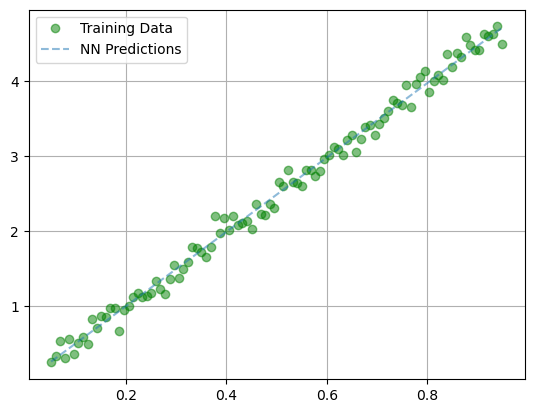

In [5]:
# TO-DO: update INPUT with the correct variables
from matplotlib import pyplot as plt, rcParams
predicted = our_model(x_data_tensor)
plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data_tensor, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

## Now test on some sample $x$ values

What are the predicted $y$ values for the following?
- $x=-0.2$
- $x=0.8$
- $x=1.5$

In [6]:
# TO-DO: write prediction code here, using the model name

test_x_array = [-0.2, 0.8, 1.5]

for x in test_x_array:
    x_tensor = Variable(torch.tensor([[x]]))
    y_pred = our_model(x_tensor).item()
    print(f"For x = {x} we predict y = {y_pred}.")


For x = -0.2 we predict y = -0.9772962331771851.
For x = 0.8 we predict y = 3.9744668006896973.
For x = 1.5 we predict y = 7.440701007843018.


Since $x = -0.2$ is not in the range of the training data the result is not reliable.

# Exercise 3: Perceptron (40 points)

In this exercise we will use a multi-layer perceptron to learn a non-linear function $y=f(x)$.

You are given the $x$ and $y$ data, and the task is to produce a machine learning model that can predict $y$ for any given $x$.

As for Exercise 2, fill in the code blocks below to model the regression and predict the output for some test $x$ values.
(Look for the comments marked "TO-DO.")


In [7]:
import torch
from torch.autograd import Variable
x_data_tensor = torch.tensor([
    [0.0500], [0.0591], [0.0682], [0.0773], [0.0864],
    [0.0955], [0.1045], [0.1136], [0.1227], [0.1318],
    [0.1409], [0.1500], [0.1591], [0.1682], [0.1773],
    [0.1864], [0.1955], [0.2045], [0.2136], [0.2227],
    [0.2318], [0.2409], [0.2500], [0.2591], [0.2682],
    [0.2773], [0.2864], [0.2955], [0.3045], [0.3136],
    [0.3227], [0.3318], [0.3409], [0.3500], [0.3591],
    [0.3682], [0.3773], [0.3864], [0.3955], [0.4045],
    [0.4136], [0.4227], [0.4318], [0.4409], [0.4500],
    [0.4591], [0.4682], [0.4773], [0.4864], [0.4955],
    [0.5045], [0.5136], [0.5227], [0.5318], [0.5409],
    [0.5500], [0.5591], [0.5682], [0.5773], [0.5864],
    [0.5955], [0.6045], [0.6136], [0.6227], [0.6318],
    [0.6409], [0.6500], [0.6591], [0.6682], [0.6773],
    [0.6864], [0.6955], [0.7045], [0.7136], [0.7227],
    [0.7318], [0.7409], [0.7500], [0.7591], [0.7682],
    [0.7773], [0.7864], [0.7955], [0.8045], [0.8136],
    [0.8227], [0.8318], [0.8409], [0.8500], [0.8591],
    [0.8682], [0.8773], [0.8864], [0.8955], [0.9045],
    [0.9136], [0.9227], [0.9318], [0.9409], [0.9500]
])
y_data_tensor = torch.tensor([
    [ 1.7583], [ 1.7594], [ 1.8341], [ 1.6776], [ 1.6192],
    [ 1.6319], [ 1.2830], [ 1.4240], [ 1.2310], [ 1.1797],
    [ 1.1209], [ 1.0473], [ 0.9846], [ 0.8850], [ 0.5541],
    [ 0.6185], [ 0.3247], [ 0.2793], [ 0.2393], [ 0.1914],
    [-0.1365], [-0.3595], [-0.4752], [-0.5761], [-0.7215],
    [-0.6921], [-0.9243], [-0.8667], [-0.8986], [-1.0227],
    [-1.3271], [-1.2883], [-1.4789], [-1.4397], [-1.5957],
    [-1.6669], [-1.6963], [-1.5355], [-1.8969], [-1.8468],
    [-1.9558], [-2.1036], [-2.0511], [-2.0254], [-2.0736],
    [-2.1414], [-2.1034], [-1.8813], [-1.9003], [-1.8852],
    [-1.7806], [-1.8672], [-1.6624], [-1.7309], [-1.6294],
    [-1.4354], [-1.3698], [-1.3055], [-1.2557], [-1.0780],
    [-1.0991], [-0.9720], [-0.6129], [-0.6491], [-0.5295],
    [-0.3640], [-0.2636], [-0.0167], [ 0.0487], [ 0.0429],
    [ 0.1645], [ 0.2342], [ 0.2722], [ 0.6613], [ 0.6190],
    [ 0.8127], [ 1.0884], [ 1.1002], [ 1.0179], [ 1.3273],
    [ 1.2551], [ 1.3914], [ 1.6677], [ 1.5505], [ 1.6793],
    [ 1.6582], [ 1.7866], [ 1.9044], [ 1.8406], [ 1.9540],
    [ 2.0823], [ 2.0165], [ 1.8276], [ 1.9111], [ 2.0306],
    [ 2.2018], [ 1.9585], [ 1.9884], [ 1.8752], [ 1.8503]
])

print(x_data_tensor.size())
print(y_data_tensor.size())


torch.Size([100, 1])
torch.Size([100, 1])


Check the model being constructed.
What do you think is the best architecture to learn this dataset?
(You can change your mind later.)

Starting with default:

complex_model = nn.Sequential(

    nn.Linear(1, x),

    nn.Sigmoid(), 

    # nn.Linear(x, x), 

    # nn.Sigmoid(),
    
    nn.Linear(x, 1) 
)

x = 3:

- like this we have one hidden layer and the structure is 1 input- 3 neurons in hidden layer - 1 ouput, but results are super bad for different epochs and lr, not even worth writing down

- commenting in the second hidden layer gives structure 1-3-3-1 but results are still bad

adjust x = 10:

- still very bad

-> The gradient of the sigmoid function is too small in the area of the data [0,1]

complex_model = nn.Sequential(
    
    nn.Linear(1, x), 

    nn.ReLU(),

    nn.Linear(x, x), 

    nn.ReLU(),

    nn.Linear(x, 1)

) 

- epoch=5000 and lr=0.01 and x=10 -> Final loss of 0.04745269939303398 but straight plot

- epoch = 5000 and lr=0.01 but x=15 -> Final loss of 0.013284734450280666 but still rather straight plot

-> Linearity of ReLU is too dominant

Adding more layers:
complex_model = nn.Sequential(
    nn.Linear(1, 15), 

    nn.ReLU(),

    nn.Linear(15, 30), 

    nn.ReLU(),

    nn.Linear(30, 30), 

    nn.ReLU(),

    nn.Linear(30, 15), 

    nn.ReLU(),

    nn.Linear(15, 1) 
)
helps to overcome linearity

- epoch = 5000 and lr=0.01 -> Final loss of 0.009692203253507614 but plot looks not really smooth
- epoch = 10000 and lr=0.005 -> Final loss of 0.009727253578603268 but plot looks not really smooth


complex_model = nn.Sequential(

    nn.Linear(1, x), 
    nn.Tanh(),

    nn.Linear(x, x), 

    nn.Tanh(),

    nn.Linear(x, 1) 
)

- epoch = 5000, lr = 0.01 and x = 3 -> Final loss of 0.015447443351149559 and curved plot
- epoch = 10000, lr = 0.005 and x = 3 -> Final loss of 0.011031584814190865 and curved plot

- epoch = 5000, lr = 0.01 and x = 10 -> Final loss of 0.010717015713453293 and curved plot
- epoch = 10000, lr = 0.005 and x = 10 -> Final loss of 0.011093240231275558 and curved plot

- epoch = 5000, lr = 0.01 and x = 15 -> Final loss of 0.01169995404779911 and curved plot
- epoch = 7000, lr = 0.005 and x = 15 -> Final loss of 0.010962283238768578 and curved plot
- epoch = 8000, lr = 0.005 and x = 15 -> Final loss of 0.01090395450592041 and curved plot

-> stuck with a loss of 0.01. The data is only scaled in the range of [0,1], so we do not use the full potential of our tanh(z) activation function. Although in that range our gradient is larger than the sigmoid gradient, we are only on one side of the saddle point and do not use the symmetry aspect of tanh(z). We could perform a rescaling of our data to [-1,1] to be more accurate.

In [8]:
# TO-DO: check architecture. Is this right for the problem?
from torch import nn, optim
complex_model = nn.Sequential(
    nn.Linear(1, 15), 
    nn.ReLU(),
    nn.Linear(15, 30), 
    nn.ReLU(),
    nn.Linear(30, 50), 
    nn.ReLU(),
    nn.Linear(50, 50), 
    nn.ReLU(),
    nn.Linear(50, 30), 
    nn.ReLU(),
    nn.Linear(30, 15), 
    nn.ReLU(),
    nn.Linear(15, 1) 
)

# TO-DO: update the learning rate
criterion = nn.MSELoss()
optimizer = optim.SGD(complex_model.parameters(), lr=0.05)

In [9]:
# TO-DO: update number of epochs
for epoch in range(10000):
    # Forward pass: Compute predicted y by passing x to the model
    pred_y = complex_model(x_data_tensor)
    loss = criterion(pred_y, y_data_tensor)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch} done! Loss = {loss}")

Epoch 0 done! Loss = 2.0288000106811523
Epoch 1 done! Loss = 2.0235984325408936
Epoch 2 done! Loss = 2.019792318344116
Epoch 3 done! Loss = 2.017000436782837
Epoch 4 done! Loss = 2.014939308166504
Epoch 5 done! Loss = 2.013408899307251
Epoch 6 done! Loss = 2.0122671127319336
Epoch 7 done! Loss = 2.011406421661377
Epoch 8 done! Loss = 2.0107505321502686
Epoch 9 done! Loss = 2.010239839553833
Epoch 10 done! Loss = 2.0098326206207275
Epoch 11 done! Loss = 2.0094943046569824
Epoch 12 done! Loss = 2.0091912746429443
Epoch 13 done! Loss = 2.008852481842041
Epoch 14 done! Loss = 2.008319616317749
Epoch 15 done! Loss = 2.0075838565826416
Epoch 16 done! Loss = 2.0072126388549805
Epoch 17 done! Loss = 2.0070297718048096
Epoch 18 done! Loss = 2.006857395172119
Epoch 19 done! Loss = 2.0066890716552734
Epoch 20 done! Loss = 2.0065243244171143
Epoch 21 done! Loss = 2.0063602924346924
Epoch 22 done! Loss = 2.0061964988708496
Epoch 23 done! Loss = 2.0060312747955322
Epoch 24 done! Loss = 2.00585532188

With plenty nodes and hidden layers it is possible to slowly overcome the linearity of ReLU. Like this, I have reached a minimal loss of 0.00625448627397418. However, the plotted curved looks not as smooth as when using tanh(z) and one should check for overfitting on test data. Assuming that the given data is following a sinosidal curve, one could implement a periodic constraint, but this should only be done if more background on the data is given.

Note: I just reran it and now my loss is 0.9205750226974487 so I'm not really convinced by ReLU. The model with tanh(z) as activation function might be more applicable for this problem, although the loss is higher. For a final answer one should check the testing data.

## Plot the output from your regression model over the same domain as the training data.

Does it make sense? If not, update the training procedure parameters until you are satisfied with the regression model.

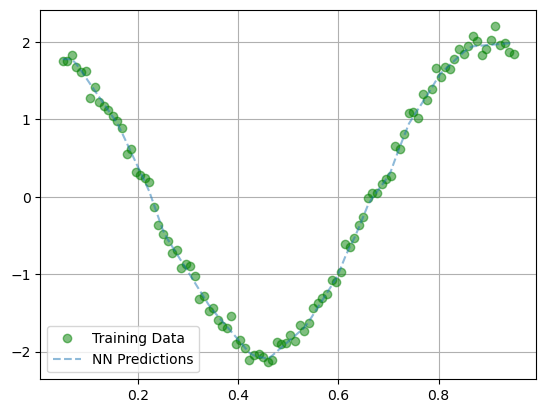

In [10]:
# TO-DO: update INPUT with the correct variables
from matplotlib import pyplot as plt, rcParams
predicted = complex_model(x_data_tensor)
plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data_tensor, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

## Now test on some sample $x$ values

What are the predicted $y$ values for the following?
- $x=-0.2$
- $x=0.4$
- $x=0.8$

In [11]:
# TO-DO: put your prediction code (aka inference code) here
test_x_array = [-0.2, 0.4, 0.8]

for x in test_x_array:
    x_tensor = Variable(torch.tensor([[x]]))
    y_pred = complex_model(x_tensor).item()
    print(f"For x = {x} we predict y = {y_pred}.")

For x = -0.2 we predict y = 1.8236271142959595.
For x = 0.4 we predict y = -1.845599889755249.
For x = 0.8 we predict y = 1.5561943054199219.


Since $x = -0.2$ is not in the range of the training data the result is not reliable.